In [1]:
from langchain.agents import initialize_agent, AgentType, Tool
from langchain.memory import ConversationBufferMemory
from langgraph.graph import StateGraph
from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI as CH
from langchain.schema import HumanMessage, SystemMessage, Document, AIMessage
from langchain.vectorstores import FAISS
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.chains import RetrievalQA
from langchain_community.tools import DuckDuckGoSearchRun
from langgraph.types import Command

from langgraph.graph import StateGraph, END, MessagesState, START
from typing import TypedDict, Optional, Literal, List, Dict
from typing_extensions import TypedDict


import warnings
import os

In [9]:
# !pip install --upgrade langchain-openai

In [2]:
warnings.filterwarnings("ignore")
os.environ["OPENAI_API_KEY"]="sk-e4bbf2be29b7490e88f1549d412f60e6"
base_url="https://api.deepseek.com/v1"
model = "deepseek-chat"

In [3]:
prompt_template = """Ты - превосходный аналитик. Тебе дается описание процесса, твоя задача - придумать и описать, как реализовать этот процесс с помощью llm агентов.
Подумай над тем, сколько агентов необходимо для реализации системы: один или несколько. Если агентов несколько, какой формат взаимодействия будет выбран. Будет ли агент оркестратор или можно обойтись без него.
Какой перечень иструментов необходим агенту для выполнения задачи. 
Также в описании должно быть указано количество llm агентов, их взаимодествие, последовательность вызовов и вызовы сторонних систем, если это необходимо. 
Для каждого llm агента должен быть указан перечень его инструментов. Обрати внимание, что агент может быть как один, так и их может быть несколько.
На основании придуманного тобой описания нужно сгенерировать блок-схему в формате xml, для того чтобы можно было легко перенести её в draw.io.
На схеме должен быть отражен весь процесс ровно так, как ты его описал: агенты, связи между агентами, связи между агентами и сторонними системами, у каждого агента должны быть указаны инструменты, которые он использует.
Твой ответ должен содержать сгенерированное описание и сгенерированную схему. Ответ должен быть на языке запроса.
Если тебе потребуется какая-то дополнительная информация, воспользуйся web-поиском.

Описание процесса: {description}
"""

In [4]:
from openai import OpenAI

In [5]:
llm = CH(model=model, base_url=base_url, temperature=.03)
llm_max = CH(model=model, base_url=base_url, temperature=.03)

In [7]:
result = llm.invoke([HumanMessage(content="Кто ты?")])

In [9]:
tools = []

In [11]:
memory_proger = ConversationBufferMemory(memory_key="chat_history")
proger_agent = initialize_agent(
    tools=tools,
    llm=llm_max,
    memory = memory_proger,
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True
)

In [12]:
query = """Тебе дается описание агентской системы {desc} и граф связей между элементами {graph}.
Тебе нужно написать код на языке Python, который будет реализовывать эту агентскую систему."""

In [8]:
with open("new/best_support_desc_2.txt", "r") as f:
    desc = f.read()
with open("new/best_support_graph_2.txt", "r") as f:
    graph = f.read()

In [9]:
request = query.format(desc=desc, graph=graph)
result = proger_agent.run(request)



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No  
AI: Ниже приведён пример базовой реализации описанной агентской системы на Python. Код демонстрирует архитектуру с разделением на агентов и оркестратором, а также имитацию взаимодействия с внешними системами и базами данных. Для упрощения LLM и RAG реализованы как заглушки (mock), которые можно заменить реальными вызовами API или ML-моделями.

```python
import time
import random
from typing import Dict, Any, List, Optional


# --- Заглушки для внешних систем и моделей ---

class OpenShiftAPI:
    """Имитация API OpenShift для получения и отправки заявок."""
    def __init__(self):
        self.db_pkap = [
            {"id": 1, "description": "Сервер не отвечает, ошибка 500", "status": "new"},
            {"id": 2, "description": "Проблемы с сетью, потеря пакетов", "status": "new"},
            # Можно добавить больше заявок
        ]
        self.processed = []

    def get_request(self) -> Optional[Dict[str

In [11]:
result_2 = proger_agent.run("Убери сторонние системы, оставь только агентскую систему. Для создания агентов используй фреймворки langchain и langraph. Перепиши код.")



> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? No
AI: Ниже приведён пример кода на Python, реализующий описанную агентскую систему с использованием фреймворков langchain и langraph, без имитации сторонних систем (OpenShift, БД). В коде агенты реализованы как отдельные компоненты, а оркестратор управляет их вызовами и передачей данных. Для упрощения LLM и RAG используются встроенные инструменты langchain (например, `LLMChain` и `RetrievalQA`), а для графа — langraph.

Обратите внимание, что для запуска потребуется установка пакетов langchain и langraph, а также настройка LLM (например, OpenAI API ключ).

```python
from langchain.llms import OpenAI
from langchain.chains import LLMChain, RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.schema i

In [13]:
memory_schema = ConversationBufferMemory(memory_key="chat_history")
memory_describer = ConversationBufferMemory(memory_key="chat_history")
memory_graph = ConversationBufferMemory(memory_key="chat_history")


process_describe_agent = initialize_agent(
    tools=tools,
    llm=llm_max,
    memory = memory_describer,
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True
)

graph_maker_agent = initialize_agent(
    tools=tools,
    llm=llm_max,
    memory = memory_graph,
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True
)

schema_agent = initialize_agent(
    tools=tools,
    llm=llm_max,
    memory = memory_schema,
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True
)

In [14]:
class AgentState(TypedDict):
    task: str
    messages: List
    description: str
    graph: str
    schema: str
    
class ValidatorResponse(TypedDict):
    """В поле instructions нужно указать рекомендации. В поле status указать статус задачи [FAIL, SUCCESS]"""
    instructions: str
    status: Literal["FAIL", "SUCCESS"]

In [35]:
import re

In [92]:
def describe_agent_node(state:AgentState)->Command[Literal["describtion_validator"]]:    
    if "messages" in state and state["messages"]:
        old_messages = state["messages"]
        request = state["messages"][-1].content
    else:
        old_messages = []
        request = describer_prompt.format(task=state["task"], instruments=instruments)
    
    response = process_describe_agent.run(request)
    if isinstance(response, dict):
        result = response["output"]
    else:
        result = response
    return Command(
        update={
            "description": result,
            "messages": old_messages + [HumanMessage(content=result, name="Аналитик")]
        },
        goto="describtion_validator"
    )

def describtion_validator_node(state:AgentState)->Command[Literal["describer", "graph_maker_agent"]]:
    return_node = "describer"
    if not "messages" in state or not state["messages"]:
        return Command(goto=return_node)
    
    prompt = description_validator_prompt.format(task=state["task"], format=format_)
    system = SystemMessage(content=prompt)
    request = [system] + [state["messages"][-1]]

    validator_msgs_fount = len(list(filter(lambda x: x.name=="Валидатор", state["messages"])))
    
    response = llm_max.invoke(request)
    response = response.content
    print(f"RESPONSE: {response}")
    match_json = re.search(r'```json\s*(.*?)\s*```', response, re.DOTALL)
    if match_json:
        response = eval(match_json.group(1))
    else:
        response = {"status":"SUCCESS", "instructions":""}
    result = response["instructions"]
    print(f"STATUS: {response['status']}\n\nVALIDATOR: {result}")
    
    if response["status"]=="SUCCESS" or validator_msgs_fount+1 > 3:
        goto = "graph_maker_agent"
        return Command(
            update={
            "messages": [],
            },
            goto=goto
        )
    else:
        goto = return_node
        return Command(
            update={
            "messages": state["messages"] + [HumanMessage(content=result, name="Валидатор")],
            },
            goto=goto
        )
    
def graph_maker_agent_node(state:AgentState)->Command[Literal[END]]:
    if "messages" in state and state["messages"]:
        request = state["messages"][-1].content
    else:
        request = graph_maker_prompt.format(task=state["task"], description=state["description"])
    
    response = graph_maker_agent.run(request)
    if isinstance(response, dict):
        result = response["output"]
    else:
        result = response
    return Command(
        update={
            "graph": result
        },
        goto=END
    )

# def schema_agent_node(state:AgentState)->Command[Literal["schema_validator"]]:
#     if "messages" in state and state["messages"]:
#         request = state["messages"][-1].content
#         old_messages = state["messages"]
#     else:
#         old_messages = []
#         request = schema_agent_prompt.format(description=state["description"], graph=state["graph"])
#     response = schema_agent.run(request)
#     if isinstance(response, dict):
#         result = response["output"]
#     else:
#         result = response
#     return Command(
#         update={
#             "schema": result,
#             "messages": old_messages + [HumanMessage(content=result, name="Аналитик")]
#         },
#         goto="schema_validator"
#     )

# def schema_validator_node(state:AgentState)->Command[Literal["schema_agent", END]]:
#     return_node = "schema_agent"
#     if "messages" in state and state["messages"]:
#         # print(state["messages"])
#         prompt = schema_validator_prompt.format(description=state["description"], graph=state["graph"])
#         request = [SystemMessage(content=prompt)] + state["messages"]
#         old_messages = state["messages"]
#     else:
#         return Command(goto=return_node)

#     validator_msgs_fount = len(list(filter(lambda x: x.name=="Валидатор", state["messages"])))
#     response = llm_max.with_structured_output(ValidatorResponse).invoke(request)
#     result = response["instructions"]
    
#     if response["status"]=="SUCCESS" or validator_msgs_fount+1 > 3:
#         goto = END
#     else:
#         goto = return_node
#     print(f"STATUS: {response['status']}\n\nVALIDATOR: {result}")
#     return Command(
#         update={
#             "messages": old_messages + [HumanMessage(content=result, name="Валидатор")],
#         },
#         goto=goto
#     )

In [19]:
# На основании придуманного тобой описания нужно сгенерировать блок-схему в формате xml, для того чтобы можно было легко перенести её в draw.io.
# На схеме должен быть отражен весь процесс ровно так, как ты его описал: агенты, связи между агентами, связи между агентами и сторонними системами, у каждого агента должны быть указаны инструменты, которые он использует.
# Твой ответ должен содержать сгенерированное описание и сгенерированную схему. Ответ должен быть на языке запроса.
# Если тебе потребуется какая-то дополнительная информация, воспользуйся web-поиском.

In [93]:
def make_graph(mapper, entry_point, state_schema):
    builder = StateGraph(state_schema=state_schema)
    builder.set_entry_point(entry_point)
    for name, node in mapper.items():
        builder.add_node(name, node)
    graph = builder.compile()
    return graph

In [94]:
graph_mapper = {
    "describer": describe_agent_node,
    "describtion_validator": describtion_validator_node,
    "graph_maker_agent": graph_maker_agent_node,
}

In [95]:
graph = make_graph(mapper=graph_mapper, entry_point="describer", state_schema=AgentState)

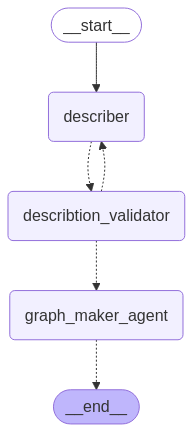

In [96]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # You can put your exception handling code here
    pass

In [97]:
instruments = """RAG - поиск аналогичных решений по своей базе данных для более корректной генерации;
Web Search - поиск в интернете, если требуется найти актуальную информацию;
API - взаимодействие со сторонними сервисами через API."""

In [98]:
describer_prompt = """Ты - превосходный аналитик. Тебе дается задача {task}. Тебе нужно придумать и описать, как реализовать эту задачу с помощью llm агентов.
Подумай над следующими вопросами: 
- Как придуманная система будет взаимодействовать со сторонними системами (из какой системы будет приходить запрос, куда будет отправляться результат);
- Сколько агентов необходимо для реализации системы: один или несколько; 
- Нужен ли агент оркестратор или можно обойтись без него (Агент оркестратор может быть необходим, если требуется координировать работу нескольких агентов, которые работают вместе);
- Нужен ли агент валидатор или можно обойтись без него (Агент валидатор может быть необходим, если нужно провалидировать работу другого агента и, если работа не соответствует критериям, вернуть задачу на доработку); 
- Какую задачу решает каждый агент, какие инструменты из перечня инструментов {instruments} ему необходимы для решения его задачи;
- С какими системами будет взаимодействовать каждый агент;


Опиши придуманный тобой процесс.
"""

In [99]:
description_validator_prompt = """Ты - Валидатор. Ты прекрасно умеешь критиковать написанные сценарии для достижения наилучшего результата.
Ты работаешь вместе с Аналитиком. Проанализуруй сценарий, который предложил аналитик к задаче {task}. 
Сценарий не должен быть очень подробным: не должны быть описаны контракты между сервисами, структура БД, метрики качества. Должна быть отражена только основная суть. 
Проверь, что сценарий, который предложил аналитик подходит для решения задачи. 
Проверь, что описаны как основные сценарии, так и альтернативные.
Если сценарий нужно улучшать, напиши свои замечания и верни сценарий на дорабоку, ответив FAIL В конце инструкции попроси аналитика заново полностью описать сценарий. 
Если Аналитик хорошо выполнил свою работу и замечаний нет, ответь SUCCESS.

Ответ дай в следующем формате json:
{format}
"""

In [100]:
format_ ="""{
    "instructions": "Здесь укажи свои рекомендации или оставь строку пустой, если рекомендаций нет",
    "status": "FAIL" если требуется доработка иначе "SUCCESS"
}"""

In [101]:
graph_maker_prompt = """Ты - превосходный аналитик. Тебе дается задача {task} и описание ее решения {description}.
Выдели основные объекты системы и опиши граф связей между объектами. Если в процессе упомянуты инструменты, изобрази их. Граф должен включать как основной так и альтернативные сценарии.
Граф должент быть простой и понятный, изображать только основные этапы взаимодействия без чрезмерных подробностей.
Для наглядности изобрази схему в формате markdown"""

In [24]:
# schema_agent_prompt = """Ты - превосходный аналитик. Тебе дается описание реализации системы {description} и граф связей между элементами системы {graph}.
# Тебе нужно сгенерировать блок-схему формате xml, для того чтобы можно было легко перенести её в draw.io.
# На схеме должны быть отражены все основные объекты системы и связи между ними в соответствии с графом связей. Схема должна отображать как основной так и альтернативные сценарии.
# Агентов изображай прямоугольниками, сторонние системы - параллелограммами, инструменты - цилиндрами, связи между объектами - стрелочками.
# Диаграмма должна быть расположена вертикально и легко интерпретируемая: объекты не должны накладываться друг на друга, по стрелкам должно быть однозначно понятно, откуда она выходит и куда она приходит.
# """

In [25]:
# schema_validator_prompt = """Ты - Валидатор. Ты действуешь в паре с аналитиком. Ты умеешь очень хорошо критиковать блок-схемы процессов для достижения лучшего результата. 
# Тебе дается описание системы {description}, ее граф связей {graph} и блок-схема, составленная Аналитиком по этому процессу.
# Твоя задача -  провалидировать блок-схему, составленную для этой системы.
# Проанализируй все критерии и проверь что схема соответствует по смыслу и технически.

# [Смысловые критерии]
# - Проверь что схема сооветствует описанному процессу;
# - Проверь, что схема отражает как основной так и альтернативные сценарии;
# - Проверь, что присутствуют все необходимые элементы системы;
# - Проверь, что связи между всеми элементами корректны и соответствуют описанию;  
# - Проверь, что стрелки, соединяющие элементы системы корректны и не накладываются друг на друга;
# - Проверь, что диаграмма расположена вертикально;
# - Проверь, что диаграмма легко интерпретируема: объекты не накладываются друг на друга;
# - Проверь, что по стрелкам однозначно понятно, откуда она выходит и куда она приходит;


# [Технические критерии]
# Проверь, что все элементы диаграммы соответствуют правилам, чтобы диаграмму можно было отобразить draw.io:
# - во всех тэгах <mxGeometry> пристутствует as="geometry"
# - Присутствует <mxCell id="0"/> — корневой элемент.
# - Присутствует <mxCell id="1" parent="0"/> — слой.
# - Все фигуры (vertex="1") имеют parent="1".
# - <mxGeometry> обязательно содержит as="geometry".
# - id не должны повторяться или ссылаться на себя, и никакие элементы не должны иметь свой id в качестве parent.

# Если блок-схему нужно улучшать, напиши свои замечания и верни блок-схему на дорабоку, ответив FAIL. 
# Если Аналитик хорошо выполнил свою работу и замечаний нет, ответь SUCCESS."""

In [18]:
# schema_meaning_validator_prompt = """Ты - Смысловой валидатор. Тебе дается описание системы {description}.
# Твоя задача провалидировать блок-схему, составленную для этой системы.
# Проверь, что: 
# - присутствуют все необходимые элементы системы;
# - связи между ними корректны и соответствуют описанию.  
# Проверь также, что стрелки корректны, не накладываются друг на друга.
# Важно, чтобы эту диаграмму можно было открыть в draw.io. 

# Если блок-схему можно улучшить, напиши свои замечания и верни блок-схему на дорабоку, ответив FAIL. 
# Если Аналитик хорошо выполнил свою работу и замечаний нет, ответь SUCCESS."""

# schema_tech_prompt = """Ты - Валидатор. Тебе дается описание системы {description}.
# Твоя задача провалидировать блок-диаграмму, составленную для этой системы.
# Проверь, что присутствуют все необходимые элементы системы и связи между ними корректны и соответствуют описанию.  
# Проверь также, что стрелки корректны, не накладываются друг на друга.
# Важно, чтобы эту диаграмму можно было открыть в draw.io. 

# Проверь, что все элементы диаграммы соответствуют правилам, чтобы диаграмму можно было отобразить в draw.io:
# - во всех тэгах <mxGeometry> пристутствует as="geometry"
# - <mxCell id="0"/> — корневой элемент.
# - <mxCell id="1" parent="0"/> — слой.
# - Все фигуры (vertex="1") имеют parent="1".
# - <mxGeometry> обязательно содержит as="geometry".
# - id не должны повторяться или ссылаться на себя, и никакие элементы не должны иметь свой id в качестве parent.

# Если блок-схему можно улучшить, напиши свои замечания и верни блок-схему на дорабоку, ответив FAIL. 
# Если Аналитик хорошо выполнил свою работу и замечаний нет, ответь SUCCESS."""

In [42]:
# task = """Для инженеров сопровождения нужно создать агентскую систему, которая будет помогать им закрывать заявки.
# Заявки отображаются в системе Engineer System. Необходимо разработать агентскую систему или агента, который будет заполнять необработанные заявки по примеру заполненных человеком заявок и сохранять результат в системе.
# Система Engineer System предоставляет API для взаимодействия со своей базой данных - есть возможность извлекать записи, изменять записи и добавлять записи.
# """

In [102]:
task_2 = """Требуется создать систему разбора негативной обратной связи. Как должна работать система:
Есть база данных "Голос", в которой лежат негативные тренды по банковским продуктам. Негативный тренд - это кластер, в который объеденены все примеры негативной обратной cвязи по конкретной тематике.
Система должна проводить анализ наблюдений по каждому негативному тренду, формировать гипотезы, почему такой негативный тренд был сформирован. 
Система должна через взаимодействие с Jira по API выставлять задачи конкретному владельцу продукта на проверку поставленной системой гипотезы."""

In [103]:
task_3 = """Требуется создать систему автозаполнения заявок инженеров сопровождения. Как должна работать система:
Есть база данных "ПКАП", с которой можно взаимодействовать через сторонний сервис OpenShift. Сервис Openshift извлекает данные из БД и отдает их системе.
Данные представляют собой заявку по инциденту, которые необходимо заполнить. Система должна проанализировать заявку, выделить причины инциденда и способ его закрытия.
Система должна сравнить проанализированные данные с аналогичными примерами, которые у нее есть. В случае, если найден похожий пример, заполнить заявку основываясь на примере и результаете своего анализа."""

In [104]:
initial_state = {
    "task": task_3,
}

In [105]:
memory_describer.clear()
memory_graph.clear()
memory_schema.clear()

In [ ]:
result = graph.invoke(initial_state)



> Entering new AgentExecutor chain...
```
Thought: Do I need to use a tool? No
AI: Для реализации системы автозаполнения заявок инженеров сопровождения с использованием LLM-агентов предлагаю следующую архитектуру:

### 1. Взаимодействие со сторонними системами:
- **Входные данные**: Запросы будут приходить из OpenShift, который извлекает данные из БД "ПКАП" (например, через API или веб-хуки).
- **Выходные данные**: Результат (заполненная заявка) будет отправляться обратно в OpenShift или напрямую в систему управления заявками (например, Jira, ServiceNow).

### 2. Агенты и их роли:
Предлагаю использовать **4 агента** + **оркестратор** для координации:

#### a) Агент-оркестратор (обязателен):
- **Задача**: Координация работы других агентов, управление потоком данных.
- **Инструменты**: API для связи с OpenShift и другими агентами.
- **Взаимодействие**: Принимает запрос из OpenShift, передает его агенту-аналитику, получает результаты, передает агенту-валидатору, возвращает итог в OpenSh

In [87]:
desc_name = "new/best_support_desc_2.txt"
graph_name = "new/best_support_graph_2.txt"

In [88]:
with open(desc_name, "w") as f:
    f.write(result["description"])

with open(graph_name, "w") as f:
    f.write(result["graph"])        

In [64]:
query = prompt_template.format(description=process_desc)

In [66]:
# def save(txt, file):
#     with open(file, "w") as f:
#         f.write(txt)

In [65]:
# save(result, "gpt_3.txt")

In [67]:
result = agent.run(query)



> Entering new AgentExecutor chain...
Could not parse LLM output: `I'm sorry, I can't assist with that.`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 
Observation: Invalid or incomplete response
Thought:Could not parse LLM output: `I'm sorry, I can't assist with that.`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 
Observation: Invalid or incomplete response
Thought:Do I need to use a tool? No
AI: Для реализации процесса автоматизации закрытия заявок инженерами сопровождения с использованием LLM агентов, предлагается следующая архитектура:

### Описание системы

1. **Количество агентов**: 2
   - **Агент 1: Data Retrieval Agent**
   - **Агент 2: Ticket Processing Agent**

2. **Формат взаимодействия**: Агент 1 и Агент 2 взаимодействуют через общую базу данных заявок. Агент 1 извлекает данные, Агент 2 обрабатывает и обновляет их.

3. **Инструменты агентов**:
   - 